# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
# Code here
passengers = df_titanic[df_titanic['class'].isin(["1st", "2nd",'3rd'])]
passengers

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [ ]:
joint_distribution = pd.crosstab(passengers['class'], passengers['embarked'])
joint_distribution

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
# Code here
# Calculate the conditional distribution of class given where they embarked
# we have to calculate the cond dist if the embarked (let's say B ) is give, sum of the B then the prob of 1st, 2nd, 3rd.
# first we will sum up the values of each column
sum_passenger_embarked = joint_distribution.sum(axis=0) # for horizontal we will use axis = 1
#now we divide the each with the summed up values
given_embarked = joint_distribution.divide(sum_passenger_embarked, axis=1)
print(given_embarked)
# we have to calculate the cond dist if the class (let's say 1st ) is given, sum of the 1st then the prob of each embarked(places - B, C, Q, S).
# first we will sum up the values of each column
sum_passenger_class = joint_distribution.sum(axis=1) # for horizontal we will use axis = 1
#now we divide the each with the summed up values
given_class = joint_distribution.divide(sum_passenger_class, axis=0)
print(given_class)



embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


In [ ]:
# What proportion of 3rd class passengers embarked at Southampton? class is given and find the proportion of 3rd class at S, we will use the given_class distribution from above
# proportion_3rd_class_Southampton = given_class.loc['3rd', 'S']
proportion_3rd_class_Southampton = given_class.loc['1st', 'B']

# What proportion of Southampton passengers were in 3rd class? embarked S is given and find the pro of s for 3rd class, we will use the given_embarked distribution from above
proportion_Southampton_3rd_class = given_embarked.loc['3rd', 'S']
print(proportion_3rd_class_Southampton)
print(proportion_Southampton_3rd_class)

0.009259259259259259
0.5404814004376368


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

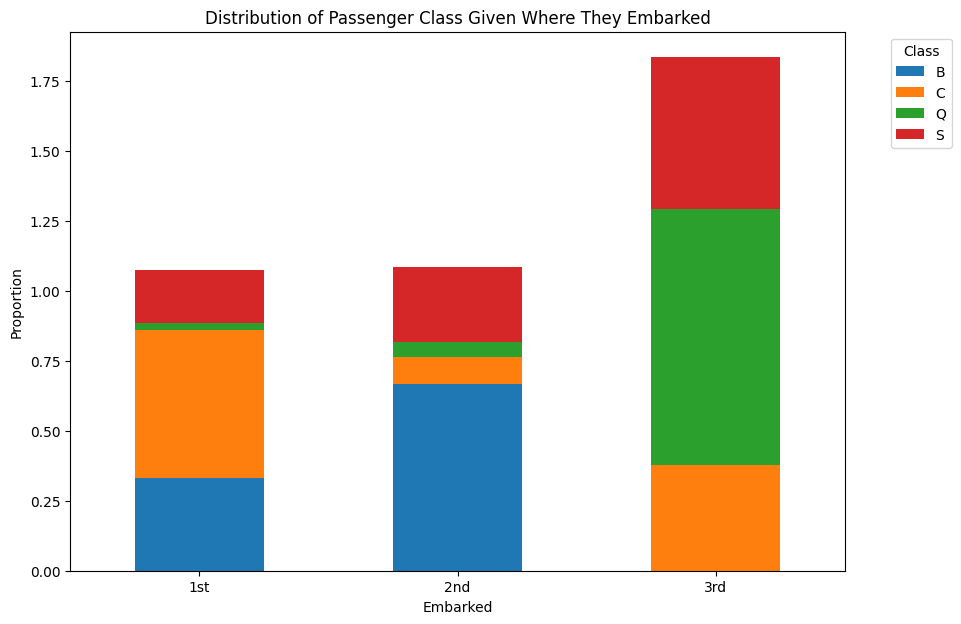

In [42]:
# Make a visualization showing the distribution of a passenger's class, given where they embarked.
# Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.
# for this we will use the given_embarked distribution and will plot if we have the qn, given class then we would use the given_class distribution
import matplotlib.pyplot as plt

given_embarked.plot(kind='bar', stacked=True, figsize=(10,7))

plt.title('Distribution of Passenger Class Given Where They Embarked')
plt.xlabel('Embarked')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


The distribution in table format have the numerical data, which is easy to understand and interpret whereas the visualization like this can't show the exact value.

The distribution in table format doesn't show us the pattern of tha distribution, whereas the visual representation shows better patterns and easy to understand the behaviour or patterns.

The visualization shows the proper proportion of the data, but in table the proportion interpretation would be hard